In [1]:
import numpy as np
import matplotlib.pyplot as plt

# INF 554 Lab 2: Supervised Classification

## Logistic Regression and Gradient Descent

In linear regression, we got a real-valued response
	
$$y = \theta_0 + \theta_1 x_1 + \cdots + \theta_d x_d$$
    
i.e., a linear combination of inputs, where $y \in \mathbf{R}$. 

In classification, we want an *indication* of how likely an instance is to belong to a particular class; a probability $\in [0,1]$.  

Given a real valued $a$, we can squish it to range $\sigma(a) \in [0,1]$ by feeding it through the **logistic function** aka **sigmoid function**:
		
\begin{equation}
\sigma(a) = \frac{1}{1+\exp(-a)} \hspace{1.5cm}(1)
\end{equation}

Which looks like this: ![Sigmoid](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

Therefore, we can treat this as a probability, i.e.,

\begin{align*}
P(y=1|\mathbf{x}) &= \sigma(\mathbf{\theta}^\top\mathbf{x}) \\
P(y=0|\mathbf{x}) &= 1 - \sigma(\mathbf{\theta}^\top\mathbf{x}) 
\end{align*}

where we omit the bias term and suppose that both $\mathbf{\theta}$ and $\mathbf{x}$ are column vectors.

> **Task 1**: implement the sigmoid function (1)


In [ ]:
def sigmoid(z):
    # insert here the code for Task 1

To fit the model, we want weights (i.e., parameters) $\mathbf{\theta}$ to reduce the error.
It means that the **likelihood** of the whole dataset can be written as: 

\begin{equation}
P\left(\{\mathbf{x}_i,y_i\}_{i=1}^n\right) = \prod_{i=1}^n P(Y = y_i|\mathbf{X} = \mathbf{x}_i) \hspace{1.5cm}(2)
\end{equation}

> **Task 2**: implement the cost function (2)

In [ ]:
def cost(w, X, y):
    # Computes the cost using w as the parameters for logistic regression.
    # TODO

As in OLS of the previous lab, and machine learning in general, we want to find values of the parameters which minimize our cost function. In this case the cost function is the negative log likelihood. We'll call this $E(\mathbf{ \theta})$. 

>**Ques 1**:Derive the gradient of the cost function with respect to the model's parameters $\nabla_{\mathbf{\theta}} E(\mathbf{\theta})$.  Hint 1: Recall you should take the *log* likelihood. Hint 2: Prior to taking the log, you an use the expression of a Bernoulli distribution, $\sigma_i^{y_i} (1-\sigma_i)^{1-y_i}$ where $\sigma_i \equiv \sigma(\mathbf{\theta}^\top\mathbf{x}_i)$. Hint 3: A useful derivative $\sigma' = (1 - \sigma)\sigma$.}

You'll notice that, unlike under OLS, it's not a closed form expression; you have $\mathbf{\theta}$ on the right hand side of the equation. Nevertheless, we can use numerical methods to find optimal ${\mathbf{\theta}^*}$.

>**Task 3**: Implement the gradient of the cost function (which you just derived above).


In [ ]:
def compute_grad(w, X, y):
    # Computes the gradient of the cost with respect to the parameters.
    
    dE = np.zeros_like(w) # initialize gradient
    
    # TODO
    
    return dE

What we have now is a vector $\mathbf{g} = \nabla_{\mathbf{\theta}} E(\mathbf{\theta})$; the **gradient** of the function. Note that the dimensionality is the same as the input. We can move in the direction of the gradient and thus descend the function. This is the idea of **Gradient Descent**: we iteratively follow the gradient down the error surface. We repeatedly carry out 
\begin{equation}
\mathbf{\theta}_{t+1} = \mathbf{\theta}_{t} - \alpha \nabla_{\mathbf{\theta}} E(\mathbf{\theta}_t) \hspace{1.5cm}(3)
\end{equation}

where $\alpha$ is the **learning rate**; for $t=1,2,\ldots,T$, such that $\mathbf{\theta}^* \gets \mathbf{\theta}_T$.

> **Task 4**: Use the functions implemented so far to implement gradient descent, Eq.(3), for a fixed number of steps (say, $T=500\,000$) and learning rate to (say, $\alpha=0.005$).


In [ ]:
alpha = 0.005
T = 500000

for i in range(T): 
    # TODO

> **Task 5**: Implement a function to provide predictions $\hat{\mathbf{y}} \in \{0,1\}$ for any given $\mathbf{x}$ and $\hat{\mathbf{\theta}}$ (from the previous task) by assigning $\hat{\mathbf{y}}_i = 1$ whenever $\sigma_i \geq 0.5$. In other words, you turn logistic regression into a **classifier**. 

In [ ]:
def predict(w, X):
    # Predict whether each label is 0 or 1 using learned logistic regression parameters w. The threshold is set at 0.5

    N = X.shape[0] # number of examples
    yp = np.zeros(N) # predicted classes of examples
    
    # TODO 
    return yp

There is data provided in the *data/* folder. Suppose that each column represents an exam score during a course, with the class label indicated *admitted* or not into a Masters program at some university. We want a model to give the probability that a student will be admitted based on the two grades of two courses. Some plotting code is already provided. 
 
> **Task 6**: Make a train-test split of the data provided and evaluate your classifier (similarly to as in the first lab). Output and/or plot the error $E(\mathbf{\theta}_t)$ both on the training **and** test set, for $t=1,\ldots,T$. Hint: You may want to plot the average of a moving window.


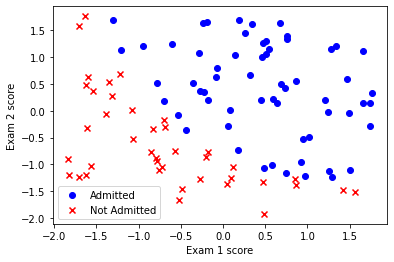

In [6]:
# Load the dataset
data = np.loadtxt('./data/data.csv', delimiter=',')
 
#Add intercept term 
data_1 = np.ones((data.shape[0], 4))
data_1[:, 1:] = data

# Standardize the data
# (It will still work without standardization, but may behave erratically)
data_1[:,1:3] = (data_1[:,1:3] - np.mean(data_1[:,1:3],axis=0)) / np.std(data_1[:,1:3],axis=0)

X = data_1[:, 0:3]
y = data_1[:, -1]

# Plot data 
pos = np.where(y == 1) # instances of class 1
neg = np.where(y == 0) # instances of class 0
plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='b')
plt.scatter(X[neg, 1], X[neg, 2], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()


N = X.shape[0]

# Initialize fitting parameters 
w = np.random.randn(3,1) * 0.05

> **Ques 2**: Knowing that the cost function is convex, are you convinced that with a suitable learning rate, gradient descent will always converge to the minimum? What are some examples of poor learning rates?

> **Task 7**: Following your considerations in the previous question -- can you find a better learning rate, such that you reduce error more efficiently (for smaller $T$?).

> **Task 8**: (Bonus) Instead of the whole training set, select a random subset (i.e., minibatch) of 10 examples for each iteration. This is known as **stochastic gradient descent**.

> **Ques 3**: (Bonus) What are the advantages of stochastic gradient descent over classical gradient descent? (Especially with a non-convex loss function).



## K-Nearest Neighbours

The method $k$NN takes a different approach to modeling $P(Y=1|\mathbf{x})$. It is a non-parametric lazy method, and does not have a "model" as such. It predicts with
$$
P(Y=1|\mathbf{x}) \approx \frac{1}{k} \sum_{\mathbf{x}_i \in \textsf{Ne}_k(\mathbf{x})} y_i 
$$
where $\textsf{Ne}_k(\mathbf{x})$ is the *neighbourhood* of the $k$ training examples closest to $\mathbf{x}$ (typically measured by Euclidean distance). 

> **Ques 4**: What is the effect of different values of $k$? Hint: Draw on paper and/or empirically test different values.

> **Ques 5**: What is the complexity of making a prediction with a naive implementation of $k$-NN? When is this likely to be a problem in practice?

> **Task 9**: (Bonus) Implement this function to create a $k$-NN classifier and evaluate it on the data provided. Hint: there is not really any training stage here; simple store the training instances to search over later.

In [ ]:
from numpy.linalg import norm

def kNN(k, X, y, x):
    '''
    kNN classification of x
    -----------------------
        Input: 
        k: number of nearest neighbors
        X: training data           
        y: class labels of training data
        x: test instance

        return the label to be associated with x

        Hint: you may use the function 'norm' 
    '''
    # Enter here your solution for Task 9